#### Question 1

                Stolen       Not Stolen     Total
        Red        3              2           5
        Yellow     2              3           5
        Total      5              5           10
        
a)Probability that a car is Yellow given that it is stole
  P(Y|S) = P(Y&S)/P(S) = 2/10/5/10 = 2/10 * 10/5 = 2/5 = 40%
   
b) Probablity that red given that it is not stolen?
  P(R|N) = P(R&N)/P(N) = 2/10/5/10 = 2/10 * 10/5 = 2/5 = 40%

##### Question 2

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
genetics_df = pd.read_csv('genetics.csv')

 Print the column names

In [3]:
print(genetics_df.columns)

Index(['CHROM', 'POS', 'REF', 'ALT', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'CLNDISDB',
       'CLNDISDBINCL', 'CLNDN', 'CLNDNINCL', 'CLNHGVS', 'CLNSIGINCL', 'CLNVC',
       'CLNVI', 'MC', 'ORIGIN', 'SSR', 'CLASS', 'Allele', 'Consequence',
       'IMPACT', 'SYMBOL', 'Feature_type', 'Feature', 'BIOTYPE', 'EXON',
       'INTRON', 'cDNA_position', 'CDS_position', 'Protein_position',
       'Amino_acids', 'Codons', 'DISTANCE', 'STRAND', 'BAM_EDIT', 'SIFT',
       'PolyPhen', 'MOTIF_NAME', 'MOTIF_POS', 'HIGH_INF_POS',
       'MOTIF_SCORE_CHANGE', 'LoFtool', 'CADD_PHRED', 'CADD_RAW', 'BLOSUM62'],
      dtype='object')


In [4]:
all_columns = genetics_df.columns.tolist()
print(all_columns)

['CHROM', 'POS', 'REF', 'ALT', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'CLNDISDB', 'CLNDISDBINCL', 'CLNDN', 'CLNDNINCL', 'CLNHGVS', 'CLNSIGINCL', 'CLNVC', 'CLNVI', 'MC', 'ORIGIN', 'SSR', 'CLASS', 'Allele', 'Consequence', 'IMPACT', 'SYMBOL', 'Feature_type', 'Feature', 'BIOTYPE', 'EXON', 'INTRON', 'cDNA_position', 'CDS_position', 'Protein_position', 'Amino_acids', 'Codons', 'DISTANCE', 'STRAND', 'BAM_EDIT', 'SIFT', 'PolyPhen', 'MOTIF_NAME', 'MOTIF_POS', 'HIGH_INF_POS', 'MOTIF_SCORE_CHANGE', 'LoFtool', 'CADD_PHRED', 'CADD_RAW', 'BLOSUM62']


Print first five rows of the dataframe

In [5]:
print(genetics_df.head(5))

  CHROM      POS REF ALT  AF_ESP  AF_EXAC  AF_TGP  \
0     1  1168180   G   C  0.0771  0.10020  0.1066   
1     1  1470752   G   A  0.0000  0.00000  0.0000   
2     1  1737942   A   G  0.0000  0.00001  0.0000   
3     1  2160305   G   A  0.0000  0.00000  0.0000   
4     1  2160305   G   T  0.0000  0.00000  0.0000   

                                            CLNDISDB CLNDISDBINCL  \
0                                    MedGen:CN169374          NaN   
1  MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...          NaN   
2  Human_Phenotype_Ontology:HP:0000486,MedGen:C00...          NaN   
3  MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...          NaN   
4     MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002          NaN   

                                               CLNDN  ...  \
0                                      not_specified  ...   
1             Spinocerebellar_ataxia_21|not_provided  ...   
2  Strabismus|Nystagmus|Hypothyroidism|Intellectu...  ...   
3          Shprintzen-

Check if there are any missing values

In [6]:
genetics_df.isnull().sum()

CHROM                     0
POS                       0
REF                       0
ALT                       0
AF_ESP                    0
AF_EXAC                   0
AF_TGP                    0
CLNDISDB                  0
CLNDISDBINCL          65021
CLNDN                     0
CLNDNINCL             65021
CLNHGVS                   0
CLNSIGINCL            65021
CLNVC                     0
CLNVI                 37529
MC                      846
ORIGIN                    0
SSR                   65058
CLASS                     0
Allele                    0
Consequence               0
IMPACT                    0
SYMBOL                   16
Feature_type             14
Feature                  14
BIOTYPE                  16
EXON                   8893
INTRON                56385
cDNA_position          8884
CDS_position           9955
Protein_position       9955
Amino_acids           10004
Codons                10004
DISTANCE              65080
STRAND                   14
BAM_EDIT            

In [7]:
#Finding columns with more than 50% of Null values
percent_missing = genetics_df.isnull().sum() * 100 / len(genetics_df)
missing_value_df = pd.DataFrame({'column_name': genetics_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending = False)
missing_value_df

,column_name,percent_missing
MOTIF_SCORE_CHANGE,MOTIF_SCORE_CHANGE,99.996932
HIGH_INF_POS,HIGH_INF_POS,99.996932
MOTIF_POS,MOTIF_POS,99.996932
MOTIF_NAME,MOTIF_NAME,99.996932
DISTANCE,DISTANCE,99.834325
SSR,SSR,99.800577
CLNSIGINCL,CLNSIGINCL,99.743818
CLNDISDBINCL,CLNDISDBINCL,99.743818
CLNDNINCL,CLNDNINCL,99.743818
INTRON,INTRON,86.495981


In [8]:
#Dropping columns with more than 50% of Null values
drop_columns = list(missing_value_df[missing_value_df['percent_missing'] >= 20].index)
genetics_df.drop(drop_columns,axis = 1, inplace=True)

In [9]:
genetics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  object 
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  object 
 3   ALT               65188 non-null  object 
 4   AF_ESP            65188 non-null  float64
 5   AF_EXAC           65188 non-null  float64
 6   AF_TGP            65188 non-null  float64
 7   CLNDISDB          65188 non-null  object 
 8   CLNDN             65188 non-null  object 
 9   CLNHGVS           65188 non-null  object 
 10  CLNVC             65188 non-null  object 
 11  MC                64342 non-null  object 
 12  ORIGIN            65188 non-null  int64  
 13  CLASS             65188 non-null  int64  
 14  Allele            65188 non-null  object 
 15  Consequence       65188 non-null  object 
 16  IMPACT            65188 non-null  object

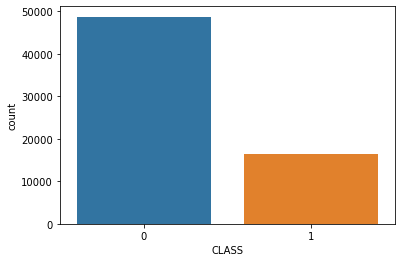

In [62]:
sns.countplot(genetics_df['CLASS'])
plt.show()

CLASS is the target variable which represents whether or not a variant has conflicting classifications, where 0 represents consistent classifications and 1 represents conflicting classifications.

In [10]:
#Find the correlation of numeric features
corr = genetics_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,POS,AF_ESP,AF_EXAC,AF_TGP,ORIGIN,CLASS,STRAND,LoFtool,CADD_PHRED,CADD_RAW
POS,1.000000,0.007003,0.007721,0.004225,0.013645,0.012061,-0.122896,0.257226,-0.005409,-0.009753
AF_ESP,0.007003,1.000000,0.851870,0.807741,-0.013563,-0.126538,-0.011551,0.027343,-0.164169,-0.148118
AF_EXAC,0.007721,0.851870,1.000000,0.805634,-0.013432,-0.121213,-0.013358,0.027831,-0.154891,-0.140803
AF_TGP,0.004225,0.807741,0.805634,1.000000,-0.014450,-0.130077,-0.014002,0.029447,-0.167057,-0.150989
ORIGIN,0.013645,-0.013563,-0.013432,-0.014450,1.000000,0.004357,-0.007564,-0.028363,0.060290,0.064609
CLASS,0.012061,-0.126538,-0.121213,-0.130077,0.004357,1.000000,-0.031369,0.000045,-0.037713,-0.053485
STRAND,-0.122896,-0.011551,-0.013358,-0.014002,-0.007564,-0.031369,1.000000,-0.160170,0.014463,0.009622
LoFtool,0.257226,0.027343,0.027831,0.029447,-0.028363,0.000045,-0.160170,1.000000,-0.038808,-0.039227
CADD_PHRED,-0.005409,-0.164169,-0.154891,-0.167057,0.060290,-0.037713,0.014463,-0.038808,1.000000,0.955003
CADD_RAW,-0.009753,-0.148118,-0.140803,-0.150989,0.064609,-0.053485,0.009622,-0.039227,0.955003,1.000000


AF_ESP, AF_EXAC, AF_TGP, CADD_RAW, CADD_RAW are highly correlated with other features, so droping those redundant columns for a better model

In [11]:
dependent_features = [ 'AF_EXAC','AF_TGP', 'CADD_RAW',  'CADD_PHRED']
genetics_df.drop(dependent_features,axis = 1, inplace=True)

#### Data Preprocessing

In [12]:
genetics_df.isnull().sum()

CHROM                   0
POS                     0
REF                     0
ALT                     0
AF_ESP                  0
CLNDISDB                0
CLNDN                   0
CLNHGVS                 0
CLNVC                   0
MC                    846
ORIGIN                  0
CLASS                   0
Allele                  0
Consequence             0
IMPACT                  0
SYMBOL                 16
Feature_type           14
Feature                14
BIOTYPE                16
EXON                 8893
cDNA_position        8884
CDS_position         9955
Protein_position     9955
Amino_acids         10004
Codons              10004
STRAND                 14
LoFtool              4213
dtype: int64

In [13]:
genetics_df.MC.value_counts()

SO:0001583|missense_variant                                                                     28457
SO:0001819|synonymous_variant                                                                   16549
SO:0001627|intron_variant                                                                        7534
SO:0001583|missense_variant,SO:0001627|intron_variant                                            2803
SO:0001589|frameshift_variant                                                                    1622
                                                                                                ...  
SO:0001575|splice_donor_variant,SO:0001623|5_prime_UTR_variant,SO:0001627|intron_variant            1
SO:0001583|missense_variant,SO:0001587|nonsense,SO:0001627|intron_variant                           1
SO:0001574|splice_acceptor_variant,SO:0001819|synonymous_variant                                    1
SO:0001589|frameshift_variant,SO:0001623|5_prime_UTR_variant,SO:0001636|2KB_upstre

In [14]:
genetics_df.EXON.value_counts()

16/16     1129
11/27      807
4/10       752
3/3        581
2/2        570
          ... 
38/62        1
23/78        1
47/62        1
22/64        1
46/102       1
Name: EXON, Length: 3264, dtype: int64

In [15]:

genetics_df.cDNA_position.value_counts()

852      31
878      30
1201     29
789      29
729      29
         ..
5415      1
96511     1
72894     1
16513     1
7697      1
Name: cDNA_position, Length: 13970, dtype: int64

In [16]:
genetics_df.CDS_position.value_counts()

1          36
696        35
379        32
465        32
402        31
           ..
373-374     1
83571       1
680-681     1
7849        1
195-?       1
Name: CDS_position, Length: 13663, dtype: int64

In [17]:

genetics_df.Protein_position.value_counts()

1          100
27          80
127         78
69          75
12          74
          ... 
3023         1
4204         1
157-158      1
2555         1
3086         1
Name: Protein_position, Length: 7339, dtype: int64

In [18]:

genetics_df.Amino_acids.value_counts()

A        2005
L        2003
P        1858
S        1710
T        1677
         ... 
NE/K*       1
QQQ/-       1
WG/CX       1
H/E         1
LP/P        1
Name: Amino_acids, Length: 1262, dtype: int64

In [19]:
genetics_df.Codons.value_counts()

cGg/cAg                915
Cgg/Tgg                852
cGc/cAc                769
Cga/Tga                734
Cgc/Tgc                730
                      ... 
ctGGAGGAGGAGGAg/ctg      1
aGAGga/aga               1
tcTTtt/tctt              1
cAA/cG                   1
Atg/Atg                  1
Name: Codons, Length: 2220, dtype: int64

In [20]:
genetics_df.STRAND.value_counts()

-1.0    32804
 1.0    32370
Name: STRAND, dtype: int64

In [21]:
genetics_df.LoFtool.value_counts()

0.97100    2836
0.08960    1953
0.78200    1909
0.00386    1228
0.02120    1094
           ... 
0.49500       1
0.00903       1
0.48400       1
0.01730       1
0.04730       1
Name: LoFtool, Length: 1195, dtype: int64

In [24]:
# genetics_df.CADD_PHRED.value_counts()

In [25]:
genetics_df.SYMBOL.value_counts()

TTN        2765
BRCA2      1934
ATM        1909
APC        1228
BRCA1      1075
           ... 
HOXD10        1
THBD          1
C21orf2       1
HNRNPH2       1
KLHL24        1
Name: SYMBOL, Length: 2328, dtype: int64

In [26]:
genetics_df.Feature_type.value_counts()

Transcript      65172
MotifFeature        2
Name: Feature_type, dtype: int64

In [27]:
genetics_df.Feature.value_counts()

NM_001267550.1    2765
NM_000059.3       1934
NM_000051.3       1909
XM_005271975.1    1228
NM_007300.3       1075
                  ... 
NM_181503.2          1
NM_000496.2          1
NM_003718.4          1
XM_005271866.1       1
XM_005274632.1       1
Name: Feature, Length: 2369, dtype: int64

In [28]:
genetics_df.BIOTYPE.value_counts()

protein_coding    65158
misc_RNA             14
Name: BIOTYPE, dtype: int64

In [30]:
# mean_columns = ['LoFtool', 'CADD_PHRED']
mean_columns = ['LoFtool']
for column in mean_columns:
    genetics_df[column].fillna(genetics_df[column].mean(), inplace=True)

In [31]:
mod_columns = ['MC', 'EXON', 'cDNA_position', 'CDS_position', 'Protein_position','Amino_acids','Codons', 'STRAND'
              ,'SYMBOL','Feature_type','Feature', 'BIOTYPE' ]
for column in mod_columns:
    genetics_df[column].fillna(genetics_df[column].mode()[0], inplace=True)

In [32]:
genetics_df.isnull().sum()

CHROM               0
POS                 0
REF                 0
ALT                 0
AF_ESP              0
CLNDISDB            0
CLNDN               0
CLNHGVS             0
CLNVC               0
MC                  0
ORIGIN              0
CLASS               0
Allele              0
Consequence         0
IMPACT              0
SYMBOL              0
Feature_type        0
Feature             0
BIOTYPE             0
EXON                0
cDNA_position       0
CDS_position        0
Protein_position    0
Amino_acids         0
Codons              0
STRAND              0
LoFtool             0
dtype: int64

Null columns has been replace with mode or mean as appropriate

In [33]:
pd.DataFrame([[i, len(genetics_df[i].unique())] for i in genetics_df.columns], 
             columns=['Column Name', 'Unique Values']).set_index('Column Name')

,Unique Values
Column Name,
CHROM,38
POS,63115
REF,866
ALT,458
AF_ESP,2842
CLNDISDB,9234
CLNDN,9260
CLNHGVS,65188
CLNVC,7


In [34]:
#Dropping POS, CLNDISDB, CLNDN, CLNHGVS, cDNA_position, CDS_position, Protein_position as those features
#has a variety of unique values and not sure about the relevance

In [35]:
unique_value_cols = ['POS', 'CLNDISDB', 'CLNDN', 'CLNHGVS', 'cDNA_position', 'CDS_position', 'Protein_position']

genetics_df.drop(unique_value_cols,axis = 1, inplace=True)

In [36]:
genetics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CHROM         65188 non-null  object 
 1   REF           65188 non-null  object 
 2   ALT           65188 non-null  object 
 3   AF_ESP        65188 non-null  float64
 4   CLNVC         65188 non-null  object 
 5   MC            65188 non-null  object 
 6   ORIGIN        65188 non-null  int64  
 7   CLASS         65188 non-null  int64  
 8   Allele        65188 non-null  object 
 9   Consequence   65188 non-null  object 
 10  IMPACT        65188 non-null  object 
 11  SYMBOL        65188 non-null  object 
 12  Feature_type  65188 non-null  object 
 13  Feature       65188 non-null  object 
 14  BIOTYPE       65188 non-null  object 
 15  EXON          65188 non-null  object 
 16  Amino_acids   65188 non-null  object 
 17  Codons        65188 non-null  object 
 18  STRAND        65188 non-nu

In [37]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder()

In [38]:
genetics_df.describe(include = 'O')

,CHROM,REF,ALT,CLNVC,MC,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,Amino_acids,Codons
count,65188,65188,65188,65188,65188,65188,65188,65188,65188,65188,65188,65188,65188,65188,65188
unique,38,866,458,7,90,374,48,4,2328,2,2369,2,3264,1262,2220
top,2,C,T,single_nucleotide_variant,SO:0001583|missense_variant,T,missense_variant,MODERATE,TTN,Transcript,NM_001267550.1,protein_coding,16/16,A,cGg/cAg
freq,8166,21798,20409,61281,29303,19991,31444,33212,2781,65186,2779,65174,10022,12009,10919


In [39]:
genetics_df.CHROM = genetics_df.CHROM.replace(['MT'],'23')
genetics_df.CHROM = genetics_df.CHROM.replace(['X'],'24')
genetics_df.CHROM = genetics_df.CHROM.astype(str)
genetics_df.CHROM = labelencoder.fit_transform(genetics_df.CHROM)
genetics_df.REF = labelencoder.fit_transform(genetics_df.REF)
genetics_df.Allele = labelencoder.fit_transform(genetics_df.Allele)
genetics_df.ALT = labelencoder.fit_transform(genetics_df.ALT)
genetics_df.CLNVC = labelencoder.fit_transform(genetics_df.CLNVC)
genetics_df.MC = labelencoder.fit_transform(genetics_df.MC)
genetics_df.Consequence = labelencoder.fit_transform(genetics_df.Consequence)
genetics_df.IMPACT = labelencoder.fit_transform(genetics_df.IMPACT)
genetics_df.SYMBOL = labelencoder.fit_transform(genetics_df.SYMBOL)
genetics_df.Feature_type = labelencoder.fit_transform(genetics_df.Feature_type)
genetics_df.Feature = labelencoder.fit_transform(genetics_df.Feature)
genetics_df.BIOTYPE = labelencoder.fit_transform(genetics_df.BIOTYPE)
genetics_df.EXON = labelencoder.fit_transform(genetics_df.EXON)
genetics_df.Amino_acids = labelencoder.fit_transform(genetics_df.Amino_acids)
genetics_df.Codons = labelencoder.fit_transform(genetics_df.Codons)

In [40]:
genetics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CHROM         65188 non-null  int64  
 1   REF           65188 non-null  int64  
 2   ALT           65188 non-null  int64  
 3   AF_ESP        65188 non-null  float64
 4   CLNVC         65188 non-null  int64  
 5   MC            65188 non-null  int64  
 6   ORIGIN        65188 non-null  int64  
 7   CLASS         65188 non-null  int64  
 8   Allele        65188 non-null  int64  
 9   Consequence   65188 non-null  int64  
 10  IMPACT        65188 non-null  int64  
 11  SYMBOL        65188 non-null  int64  
 12  Feature_type  65188 non-null  int64  
 13  Feature       65188 non-null  int64  
 14  BIOTYPE       65188 non-null  int64  
 15  EXON          65188 non-null  int64  
 16  Amino_acids   65188 non-null  int64  
 17  Codons        65188 non-null  int64  
 18  STRAND        65188 non-nu

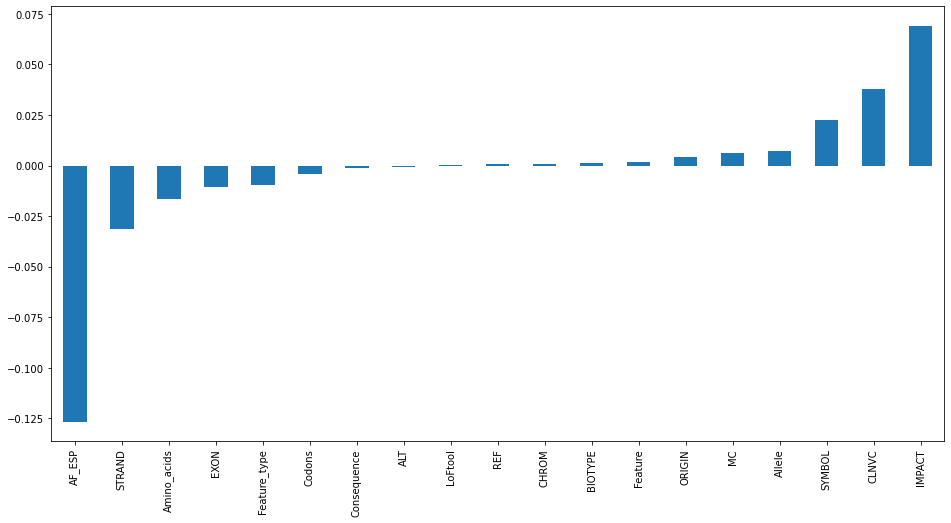

In [41]:
plt.figure(figsize=(16,8))
genetics_df.corr()['CLASS'].sort_values()[:-1].plot(kind='bar')
plt.show()

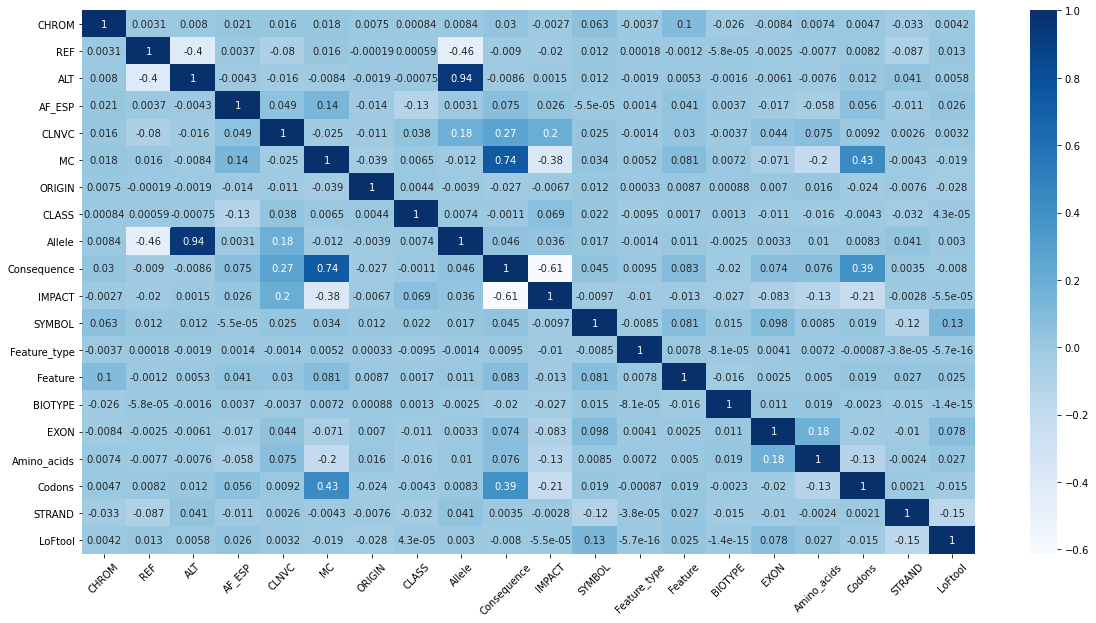

In [50]:

fig = plt.figure(figsize=(20, 10))
sns.heatmap(genetics_df.corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

In [44]:
drop_features = ['CLASS', 'ALT', 'MC', 'IMPACT']
X = genetics_df.drop(drop_features, axis=1)
y = genetics_df['CLASS']

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CHROM         65188 non-null  int64  
 1   REF           65188 non-null  int64  
 2   AF_ESP        65188 non-null  float64
 3   CLNVC         65188 non-null  int64  
 4   ORIGIN        65188 non-null  int64  
 5   Allele        65188 non-null  int64  
 6   Consequence   65188 non-null  int64  
 7   SYMBOL        65188 non-null  int64  
 8   Feature_type  65188 non-null  int64  
 9   Feature       65188 non-null  int64  
 10  BIOTYPE       65188 non-null  int64  
 11  EXON          65188 non-null  int64  
 12  Amino_acids   65188 non-null  int64  
 13  Codons        65188 non-null  int64  
 14  STRAND        65188 non-null  float64
 15  LoFtool       65188 non-null  float64
dtypes: float64(3), int64(13)
memory usage: 8.0 MB


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# Split to train and test with 80-20 ratio
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Use Standard scaler for features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [65]:
models = []
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=4, 
                             min_samples_leaf = 4, random_state=42)
nb = GaussianNB() 
lr = LogisticRegression()

models.extend([rfc, nb])

#Evaluate models and listing different evaluation metrics

print("Beginning Model Evalution")
print('--------------------------')
for model in models:
    print(model)
    print()
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    print("accuracy_score: %0.2f" %(accuracy_score(y_test, ypred)))
    print()
    print('Confusion Matrix')
    print(confusion_matrix(y_test, ypred))
    print()
    print("f1_score: %0.2f" %(f1_score(y_test, ypred)))
    print()
    print(classification_report(y_test,ypred))  
    print('*******************************************')

Beginning Model Evalution
--------------------------
RandomForestClassifier(min_samples_leaf=4, min_samples_split=4, random_state=42)

accuracy_score: 0.71

Confusion Matrix
[[8546 1222]
 [2505  765]]

f1_score: 0.29

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      9768
           1       0.39      0.23      0.29      3270

    accuracy                           0.71     13038
   macro avg       0.58      0.55      0.56     13038
weighted avg       0.68      0.71      0.69     13038

*******************************************
GaussianNB()

accuracy_score: 0.25

Confusion Matrix
[[   0 9768]
 [   0 3270]]

f1_score: 0.40

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9768
           1       0.25      1.00      0.40      3270

    accuracy                           0.25     13038
   macro avg       0.13      0.50      0.20     13038
weighted avg       0.06      0.25      0.1

#### Conclusion

Target variable 0 represents consistent classifications and 1 represents conflicting classifications. Random Forest has higher accuracy than GaussianNB model. But the F1 score of Guassian model is higher than Random Forest, but still less than 50% for both the models. Based on the confusion matrix, Gaussian model doesn't show any consistent classification of Genetic variants for predicted values. So Random Forest will be the best model for this data set. 

Note: Multiple columns were removed when percentage of null values is more than 50%. The relevance of all features is  not known at this point. 